# IIR 1st order low-pass filter (fixed notation)

This notebook provide an analysis of a 1st order low-pass IIR filter (implemented in C as "DigFilt.h / .c" files).
Discretization is performed through Euler approximation.

CCDE is the following:

$$
  y[n] = y[n-1] + k (x[n] - y[n-1])
$$

thus the Z-transform is:

$$
  H(z) = \frac{k}{1 + (k-1)z^{-1}}, \quad k < 1
$$

We can simply compute the H(e^jw) for the case of interest admitted in the fixed notation math:

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython

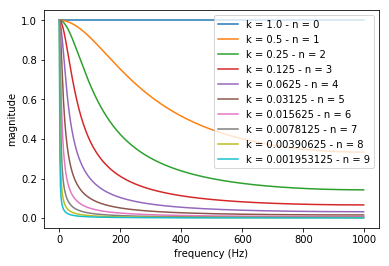

In [3]:
from scipy import signal

fs = 2000   #2kHz samples

for n in range(0,10):
    k = 1.0/2**n # k = Ts/(Ts+tau) the trick for fixed math notation is to keep tau = 2^n - 1, 
                 # so that multiply for k = 2^-n becomes a simply left shift of n positions
    w, h = signal.freqz(k, [1, k-1])
    plt.plot((fs/2)*(w/np.pi), abs(h), label='k = ' + str(k) + ' - n = ' + str(n));

plt.xlabel("frequency (Hz)");
plt.ylabel("magnitude");
plt.legend();

So, with fs = 2kHz, we have a good rejection of 50Hz noise, starting from n = 7.